In [25]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline


In [26]:
#Importing the dataset
data = pd.read_csv("C:\\Users\\hp\\Desktop\\uii\\supermarket_sales - Sheet1.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [46]:
#Initializing the variables
X = data['Unit price'].values.reshape(-1,1)
y = data['Total'].values.reshape(-1,1)

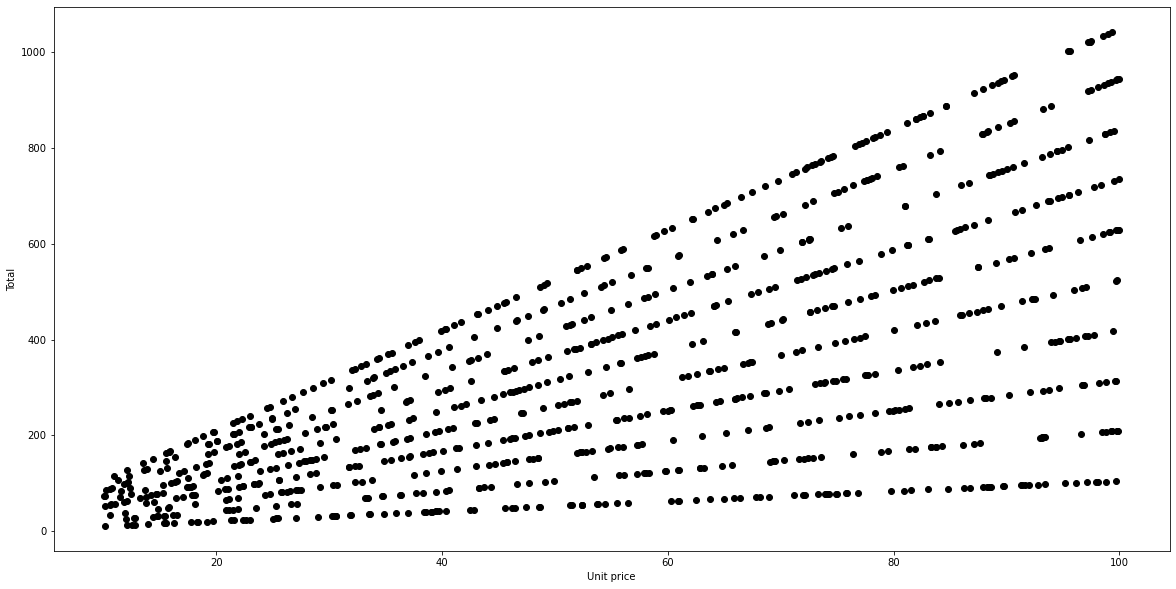

In [47]:
#Ploting a graph to see the points
plt.figure(figsize=(20, 10))
plt.scatter(X, y, c='black')
plt.xlabel("Unit price")
plt.ylabel("Total")
plt.show()



In [33]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

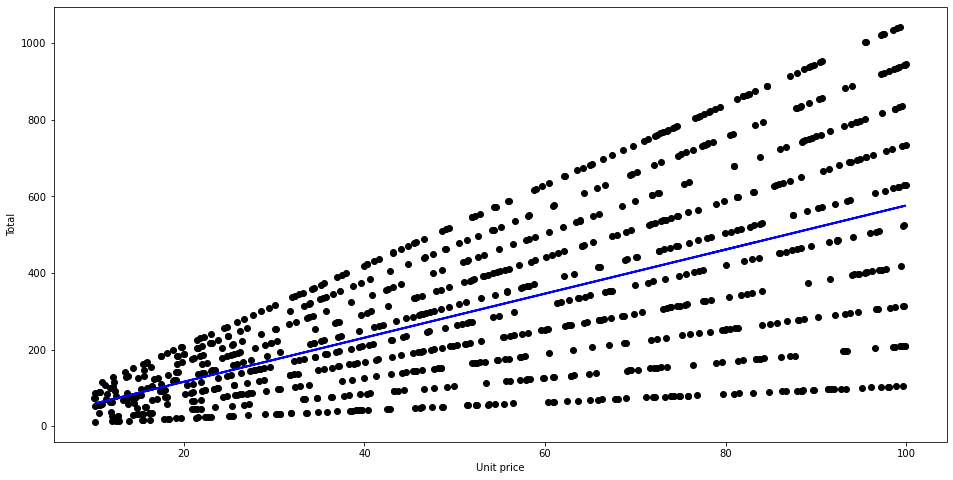

In [35]:
#predicting the Test set result
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Unit price")
plt.ylabel("Total")
plt.show()

In [36]:
#Calculating the Coefficients
reg.coef_

array([[5.7535703]])

In [37]:
#Calculating the Intercept
reg.intercept_

array([0.70714527])

In [38]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4563487815095947

In [39]:
output = reg.predict([[230.1]])
output

array([[1324.60367047]])

In [41]:
#Initializing the variables
X = data.drop(['Total'], axis=1)
y = data['Total'].values.reshape(-1,1)

In [48]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [50]:
#predicting the Test set result
y_pred = multiple_reg.predict(X_test)

In [51]:
#Calculating the Coefficients
multiple_reg.coef_

array([[5.7535703]])

In [52]:
#Calculating the Intercept
multiple_reg.intercept_

array([0.70714527])

In [54]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4563487815095947

In [58]:
#Taking the input from the user
print("Enter the unit price of the product")
unit_price = float(input("unit price : "))


#predicting the sales with respect to the inputs
output = multiple_reg.predict([[unit_price]])
print("you will get Kshs{:.2f} sales by selling Kshs{} on unit price,."\
      .format(output[0][0] if output else "not predictable",unit_price))

Enter the unit price of the product
unit price : 56
you will get Kshs322.91 sales by selling Kshs56.0 on unit price,.


In [59]:
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "C:\\Users\\hp\\Desktop\\multiple_reg.sav"
pickle.dump(multiple_reg, open(MODEL_PATH, 'wb'))